In [1]:
from script_figure import AIC_length_model_OU as AIC_length_model
from script_figure import matrix_infered_OU as matrix_infered
from script_figure import plot_error_and_accuracy 
from script_figure import plot_error_dim_OU as plot_error_dim
import importlib, os
import _helper._load_csv as lcsv
import importlib
import SFFI.util_plot as ut 
import matplotlib.pyplot as plt
from script_figure import plot_trajectory as pt
from script_figure import labels_plot
from simulation_models import Ornstein_Uhlenbeck
import script_figure.helper_figure as hf
import matplotlib.gridspec as gridspec
from script_figure import plot_time_vs_key
import seaborn as sns 
import numpy as np
from scipy.stats import norm
from scipy.stats import chi2
import scipy.special 
ut.set_favorite_plot_config()
lcsv.aggreagate_csv_from_cluster(select_file="Ornstein", path=os.path.abspath('') + "/csv")
lcsv.aggreagate_csv_from_cluster(select_file="", path=os.path.abspath('') + "/csv")
model_class = Ornstein_Uhlenbeck.OrnsteinUhlenbeck

Look in  /home/andonis/These/Jupyter/PASTIS_PRL_github/csv
['lotka_volterra_dim_7_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_n.pkl', 'OrnsteinUhlenbeck_repulsive_gaussian_diffusion_strength.pkl', 'large_deviation_dim_8.pkl', 'large_deviation_dim_3.pkl', 'large_deviation_dim_6.pkl', 'OrnsteinUhlenbeck_dim_10_n.pkl', 'lotka_volterra_dim_7_benchmark_sindy_n.pkl', 'lorenz_critical_constant_noise_p_n.pkl', 'Misspecified_model_figure_1_diffusion_strength.pkl', 'lotka_volterra_dim_7_p_n.pkl', 'grayscott_dt.pkl', 'OrnsteinUhlenbeck_p_dim_10_n.pkl', 'grayscott_n.pkl', 'grayscott_p_n.pkl', 'grayscott_diffusion_strength.pkl', 'lorenz_critical_constant_noise_n.pkl', 'lorenz_critical_constant_noise_experimental_noise.pkl', 'lorenz_critical_constant_noise_diffusion_vs_time_diffusion_strength.pkl', 'lotka_volterra_dim_7_diffusion_strength.pkl', 'lorenz_critical_constant_noise_dt.pkl', 'large_deviation_dim_7.pkl', 'large_deviation_dim_9.pkl', 'large_deviation_dim_10.pkl', 'large_deviation_dim_5.pkl

In [2]:
import pandas as pd
import numpy as np

def error_bar(pd_series, **kwargs):
    mean = pd_series.mean()
    sd = mean**0.5/np.sqrt(int(pd_series.count()))
    print(pd_series.count())
    return mean - sd, mean + sd

def extract_for_p_plot(df):
    name_method_begin = "PASTIS_p_"
    name_method_end = "Ito_trapeze_large_dt_A_True_diffusion_Constant_time_correction"
    df_extract = df[df["method"].str.startswith(name_method_begin, na=False)].copy()
    df_extract = df_extract[df_extract["method"].str.endswith(name_method_end, na=False)].copy()
    #print(df_extract.method.unique())
    df_extract["p"] = df_extract["method"].str.extract(r"PASTIS_p_(.*?)_Ito").astype(float)
    df_extract["method"] = labels_plot.find_key_for_value_in_global_dict("PASTIS $\Delta t$")
    
    name_method_begin = "PASTIS_p_"
    name_method_end = "Ito_A_True_diffusion_Constant"
    df_extract_2 = df[df["method"].str.startswith(name_method_begin, na=False)].copy()
    df_extract_2 = df_extract_2[df_extract_2["method"].str.endswith(name_method_end, na=False)].copy()
    #print(df_extract_2.method.unique())
    df_extract_2["p"] = df_extract_2["method"].str.extract(r"PASTIS_p_(.*?)_Ito").astype(float)
    df_extract_2["method"] = labels_plot.find_key_for_value_in_global_dict("PASTIS")
    df_ = pd.concat([df_extract, df_extract_2])
    return df_

#name_csv_time =  "lorenz_critical_constant_noise_p_n" + ".pkl"
#name_csv_time = "grayscott_p_n.pkl"
name_csv_time = "OrnsteinUhlenbeck_p_dim_10_n.pkl"
df = lcsv.read_csv(name_csv_time)
df_extract = extract_for_p_plot(df)
df.method.unique()
for i in range(len(df.method.unique())):
    df_ = df[df.method==df.method.unique()[i]]
    df_ = df_[df_.time==df_.time.unique()[0]]
    print(len(df_))

[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_p_dim_10_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_p_dim_10_n.pkl'
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95


[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_p_dim_10_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_p_dim_10_n.pkl'


/tmp/ipykernel_457182/246424370.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_extract = df_extract[mask]


95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_p_dim_10_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_p_dim_10_n.pkl'


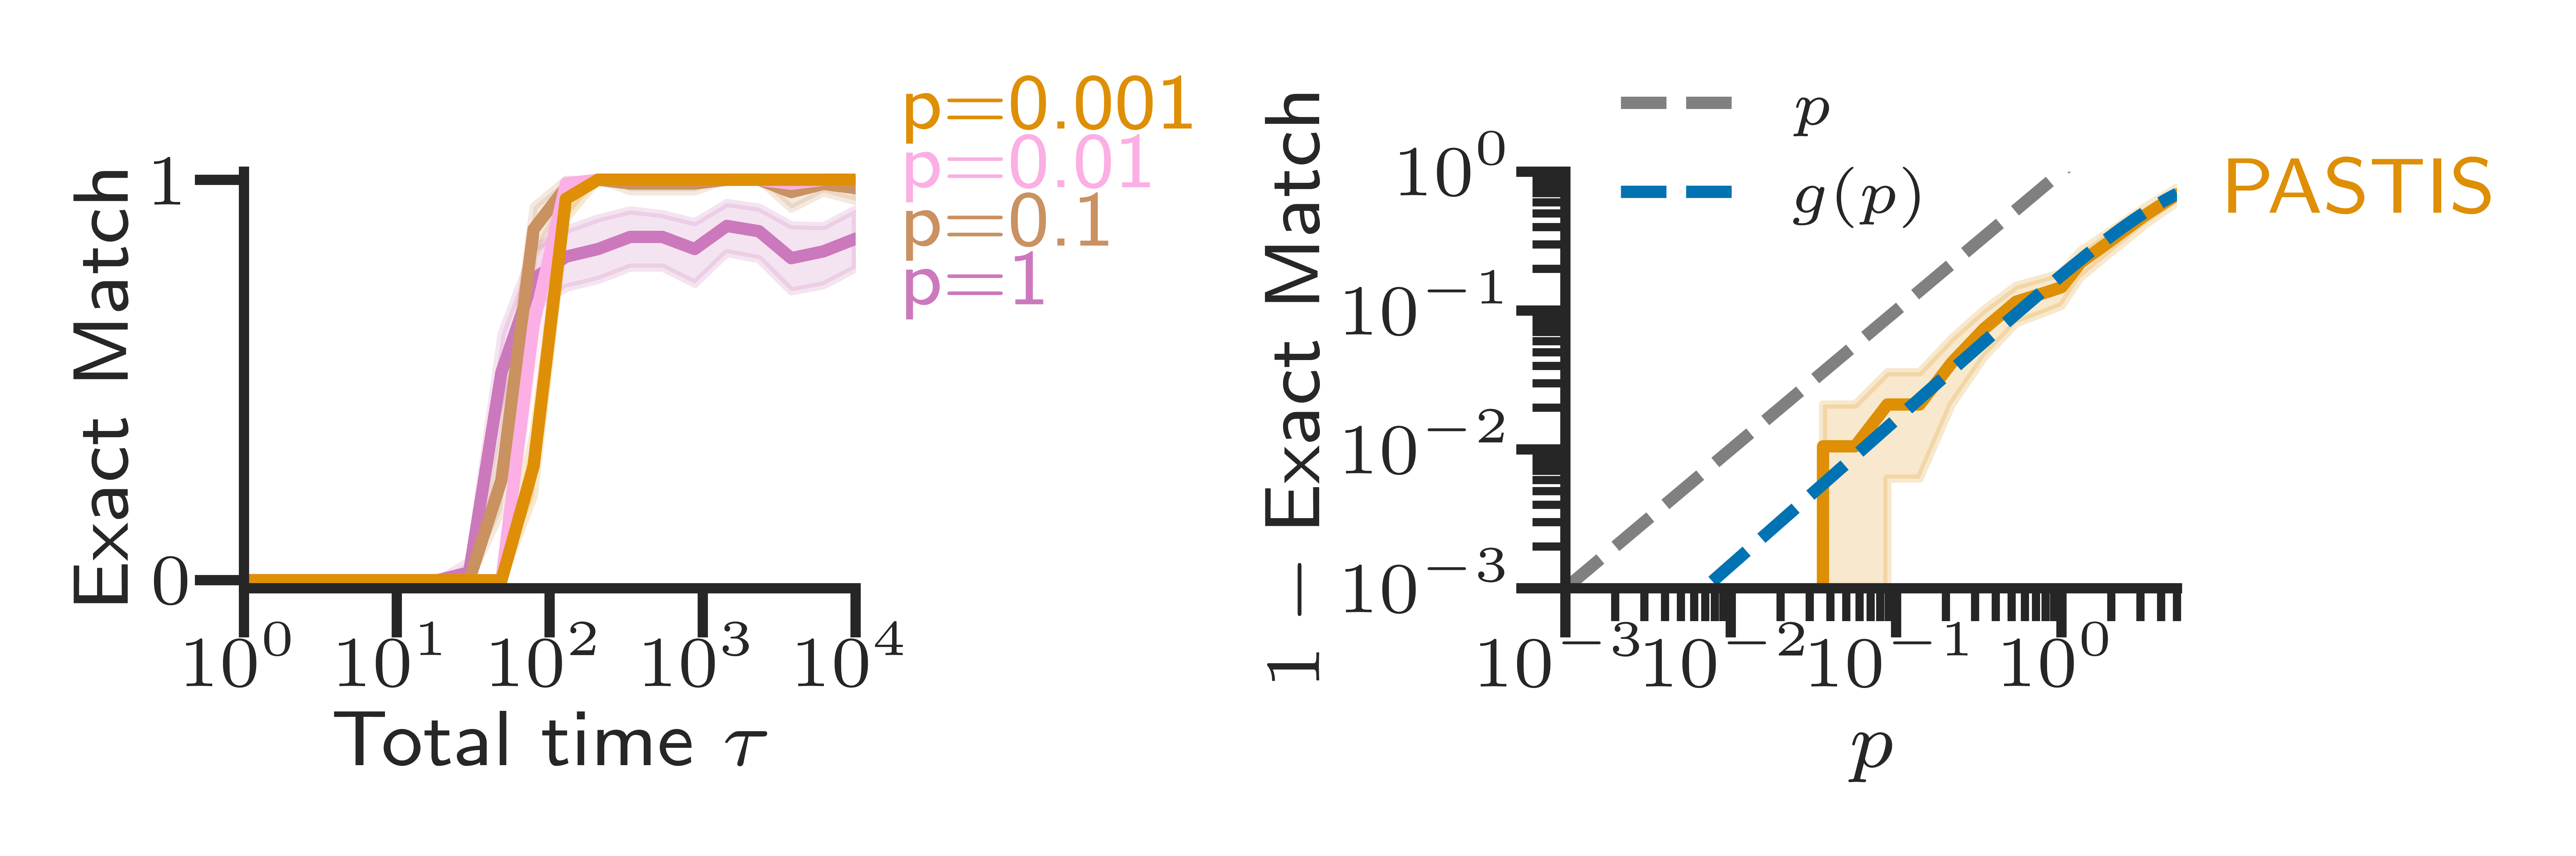

In [3]:
importlib.reload(plot_error_and_accuracy)
from matplotlib import ticker as mticker
# import pylustrator
# pylustrator.start()
import numpy as np
ut.set_favorite_plot_config()

def extract_size_model(df, method):
    mask = df.method == method#"Total_model_Ito_A_True_diffusion_Constant"
    return len(list(df[mask].base_infered)[0])

def plot_p_vs_error(name_csv_time_lo, ax=None, filter_time=None, free_parameters=None, legend=True, bbox_to_anchor_legend_p=(0, 1.35)):
    df = lcsv.read_csv(name_csv_time_lo)
    df_extract = extract_for_p_plot(df)
    if filter_time is None:
        mask = df["time"] == np.max(df_extract["time"].unique())  #>=  3*10**3
    else:
        mask = df["time"] >= filter_time
    df_extract = df_extract[mask]
    df_extract["1-exact_match"] = 1 - df_extract["Exact_model_found"]
    axs = None
    if ax is not None:
        axs = [ax]
    axs = plot_error_and_accuracy.plot_from_csv("",
                                            method_to_plot=["PASTIS", "PASTIS $\Delta t$"],
                                            l_y_plot=["1-exact_match"],
                                            parameter="p",
                                            df = df_extract,
                                            errorbar=error_bar,
                                            axs=axs,
                                            legend=legend,
                                            add_legend_on_line=legend,
                                            )
    xx = np.linspace(axs[0].get_xlim()[0], axs[0].get_xlim()[1], 100)
    axs[0].plot(xx, xx, '--', label='$p$', c='gray')
    total_parameters = extract_size_model(df, "Total_model_Ito_A_True_diffusion_Constant") #110
    if free_parameters is None:
        free_parameters = total_parameters - extract_size_model(df, "Real_model_Ito_A_True_diffusion_Constant")#19
        
    p_rescaled = np.log(total_parameters/xx)
    exact_real = 1 - scipy.special.erf(np.sqrt(p_rescaled))**free_parameters
    label = "$g(p)$" #r'$1 - \erf{\left(\sqrt{\log{\frac{n_0}{p}}}\right)}^{n_0 - n^*}$'
    axs[0].plot(xx, exact_real, '--', label=label, c='b')
    axs[0].set_ylim(bottom=np.min(exact_real))
    handles, labels = axs[0].get_legend_handles_labels()
    keep = [(h, l) for h, l in zip(handles, labels) if "PASTIS" not in l]
    if legend and keep:
        handles, labels = zip(*keep)
        legend = axs[0].legend(handles, labels, fontsize=6, loc='upper left', bbox_to_anchor=bbox_to_anchor_legend_p, frameon=False)
        legend.set_in_layout(False)
    else:
        axs[0].legend([], [], frameon=False)
    axs[0].set_yscale("log")
    axs[0].set_ylabel(r"$1 - \text{Exact Match}$")
    axs[0].set_xlabel(r"$p$")
    axs[0].xaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=10))
    axs[0].yaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=10))

def plot_impact_p_2_plots(name_csv_time_lo, filter_time=None, gs0=None, fig=None, title=None, legend=True, bbox_to_anchor_legend_p=(0, 1.35)):
    if gs0 is None or fig is None:
        fig = plt.figure(figsize=ut.set_size(width="article", fraction=1, subplots=(1, 2)), layout='constrained')
        gs0 = gridspec.GridSpec(1, 2, figure=fig)
    ax_time = fig.add_subplot(gs0[0])
    ax_p =  fig.add_subplot(gs0[1])
    
    plot_p_vs_error(name_csv_time_lo, ax=ax_p, filter_time=filter_time, legend=legend, bbox_to_anchor_legend_p=bbox_to_anchor_legend_p)
    
    label_dict = {
                "PASTIS_p_0.001_Ito_A_True_diffusion_Constant" : ("p=0.001", labels_plot.cmaps[4]),
                "PASTIS_p_1.0_Ito_A_True_diffusion_Constant" : ("p=1", labels_plot.cmaps[5]),
                "PASTIS_p_0.1_Ito_A_True_diffusion_Constant" : ("p=0.1", labels_plot.cmaps[6]),
                "PASTIS_p_0.01_Ito_A_True_diffusion_Constant" : ("p=0.01", labels_plot.cmaps[7]),
                #"PASTIS_p_0.001_Ito Pierre_idea_A_True_diffusion_Constant" : (r"$I_\tau$",  labels_plot.s_color(6, 0.59)),
                }
    method_to_plot = ["p=1", "p=0.1", "p=0.01", "p=0.001", r"$I_\tau$"]
    plot_error_and_accuracy.plot_from_csv(name_csv_time_lo, 
                                    parameter="time",
                                    method_to_plot=method_to_plot,
                                    l_y_plot=["Exact_model_found"],
                                    axs=[ax_time],
                                    add_legend_on_line=legend,
                                    label_dict=label_dict,
                                    #max_x_axis=10**3,
                                    #min_x_axis=10**1,
                                    method_to_put_last="p=0.001"
                                    )
    ax_time.xaxis.set_major_locator(mticker.LogLocator(base=10.0, numticks=10))
    
    if title is not None:
        ax_time.set_title(title)
        ax_p.set_title(title)
    else:
        ax_time.set_title(name_csv_time_lo)
    return ax_time, ax_p


name_csv_time_OU = "OrnsteinUhlenbeck_p_dim_10_n.pkl"
name_csv_time_lo =  "lorenz_critical_constant_noise_p_n" + ".pkl"
ax_time_2, ax_p_2 = plot_impact_p_2_plots(name_csv_time_OU,  title = "")
ax_p_2.set_ylim(bottom=10**(-3), top=1)

plt.savefig("figures/OU_p.png", bbox_inches='tight')

In [4]:
ut.set_favorite_plot_config(font_scale=0.7)
fig = plt.figure(figsize=ut.set_size(width="article", subplots=(4, 2), fraction=1, scale_height=1), layout='constrained')
gs0 = gridspec.GridSpec(4, 1, figure=fig)
gs00 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[0])
gs01 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[1])
gs02 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[2])
gs03 = gridspec.GridSpecFromSubplotSpec(1, 2, subplot_spec=gs0[3])

name_csv_time_lotka =  "lotka_volterra_dim_7_p_n.pkl"
name_csv_time_OU = "OrnsteinUhlenbeck_p_dim_10_n.pkl"
name_csv_time_lo =  "lorenz_critical_constant_noise_p_n" + ".pkl"
name_csv_time_grayscott = "grayscott_p_n.pkl"

bbox_to_anchor_legend_p = (0, 1.15)

ax_time_1, ax_p_1 = plot_impact_p_2_plots(name_csv_time_OU, filter_time=5*10**2, gs0=gs00, fig=fig, bbox_to_anchor_legend_p=bbox_to_anchor_legend_p, title="Ornstein-Uhlenbeck")
ax_time_2, ax_p_2 = plot_impact_p_2_plots(name_csv_time_lo, filter_time=5*10**3, gs0=gs01, fig=fig, bbox_to_anchor_legend_p=bbox_to_anchor_legend_p, title = "Lorenz")
ax_time_3, ax_p_3 = plot_impact_p_2_plots(name_csv_time_lotka, filter_time=3*10**3, gs0=gs02, fig=fig, bbox_to_anchor_legend_p=bbox_to_anchor_legend_p, title = "Lotka-Volterra")
ax_time_4, ax_p_4 = plot_impact_p_2_plots(name_csv_time_grayscott, filter_time=10**1, gs0=gs03, fig=fig, bbox_to_anchor_legend_p=bbox_to_anchor_legend_p, title = "Gray-Scott")

x_letter = -0.2
y_letter = 1.1
hf.add_letter(ax_time_1, "a", x=x_letter, y=y_letter)
hf.add_letter(ax_time_2, "c", x=x_letter, y=y_letter)
hf.add_letter(ax_time_3, "e", x=x_letter, y=y_letter)
hf.add_letter(ax_time_4, "g", x=x_letter, y=y_letter)
hf.add_letter(ax_p_1, "b", x=x_letter, y=y_letter)
hf.add_letter(ax_p_2, "d", x=x_letter, y=y_letter)
hf.add_letter(ax_p_3, "f", x=x_letter, y=y_letter)
hf.add_letter(ax_p_4, "h", x=x_letter, y=y_letter)

plt.savefig("figures/benchmark_p.pdf", bbox_inches='tight')

[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_p_dim_10_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_p_dim_10_n.pkl'


/tmp/ipykernel_457182/246424370.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_extract = df_extract[mask]


701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
701
[Errno 2] No such file or directory: 'OrnsteinUhlenbeck_p_dim_10_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/OrnsteinUhlenbeck_p_dim_10_n.pkl'
[Errno 2] No such file or directory: 'lorenz_critical_constant_noise_p_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lorenz_critical_constant_noise_p_n.pkl'


/tmp/ipykernel_457182/246424370.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_extract = df_extract[mask]


86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
86
[Errno 2] No such file or directory: 'lorenz_critical_constant_noise_p_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lorenz_critical_constant_noise_p_n.pkl'
[Errno 2] No such file or directory: 'lotka_volterra_dim_7_p_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_p_n.pkl'


/tmp/ipykernel_457182/246424370.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_extract = df_extract[mask]


384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
384
[Errno 2] No such file or directory: 'lotka_volterra_dim_7_p_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/lotka_volterra_dim_7_p_n.pkl'
[Errno 2] No such file or directory: 'grayscott_p_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_p_n.pkl'


/tmp/ipykernel_457182/246424370.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_extract = df_extract[mask]


275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
275
[Errno 2] No such file or directory: 'grayscott_p_n.pkl'
[Errno 2] No such file or directory: '/home/andonis/These/Jupyter/csv/grayscott_p_n.pkl'
